*Data Analysis part BIG DATA*




In [1]:
#Récuperation de la base de données (très lourde ~6 GB)
!wget -q https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv

In [2]:
#Import et mise en place du DataFrame contenant la BDD (peut durer quelques minutes)
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

base = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')                       


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,8,14,20,21,22,23,24,28,29,30,32,33,40,42,43,44,63,74,76) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Voir les sorties des affichages en entier (toutes les colonnes et les lignes)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [84]:
base.shape

(2287298, 186)

In [85]:
base.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [86]:
base.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,nutriscore_score,nova_group,ecoscore_score,energy-kcal_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,2.287298e+06,2.287298e+06,0.0,0.0,5.315130e+05,0.0,759140.000000,0.0,780446.000000,683014.000000,519933.000000,1.766691e+06,985.000000,1.805921e+06,1.760517e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48508.000000,48478.000000,2229.000000,0.0,0.0,0.0,602.000000,0.0,0.0,0.0,0.0,136.000000,0.0,0.0,0.0,0.0,0.0,0.0,265415.000000,269438.000000,1.805486e+06,1.787270e+06,0.0,0.0,0.0,0.0,0.0,0.0,567.000000,3810.000000,6.617750e+05,3613.000000,3339.000000,1.807382e+06,69.000000,100.000000,61.000000,1.661275e+06,1.661272e+06,2.559800e+04,212982.000000,84.000000,1.052900e+04,3896.000000,1295.000000,220869.000000,24006.000000,23104.000000,24134.000000,16430.000000,10583.000000,8499.000000,1.337000e+04,1.302000e+03,6390.000000,196.000000,483.000000,92776.000000,893.000000,2.720150e+05,14205.000000,265793.000000,15077.000000,1.046500e+04,4389.000000,4183.000000,423.000000,2637.000000,235.000000,386.000000,2510.000000,583.000000,266.000000,263.000000,9890.00000,913.000000,11949.000000,757834.000000,319.000000,6742.000000,5.000000,489.000000,12139.000000,780450.000000,6.000000,5.0000,2.000000,74.000000,1712.000000,41.000000,77.000000,45.000000
mean,1.570945e+09,1.610516e+09,NaN,NaN,2.090476e+16,NaN,2.011114,NaN,9.090714,3.381664,43.572423,-2.755232e+12,326.853198,5.537999e+11,5.676898e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.089079,5.946065,18.871723,NaN,NaN,NaN,27.219382,NaN,NaN,NaN,NaN,178.404401,NaN,NaN,NaN,NaN,NaN,NaN,0.162918,0.060027,5.537873e+04,5.600718e+07,NaN,NaN,NaN,NaN,NaN,NaN,157.862905,32.733962,1.482872e+41,2.427766,4.272771,5.530436e+04,32.803648,274.428430,11.451905,6.015707e+04,2.406287e+04,1.953282e+19,1.687843,0.538019,1.123391e+01,1.507838,6.217691,0.114121,8.810768,0.182672,0.570016,0.943530,14.589418,0.051402,3.267807e+00,7.681261e+04,0.684902,1.492876,2.031398,0.848193,3.545233

In [38]:
base.dtypes

code                                                      object
url                                                       object
creator                                                   object
created_t                                                  int64
created_datetime                                          object
last_modified_t                                            int64
last_modified_datetime                                    object
product_name                                              object
abbreviated_product_name                                  object
generic_name                                              object
quantity                                                  object
packaging                                                 object
packaging_tags                                            object
packaging_en                                              object
packaging_text                                            object
brands                   

In [87]:
#Premier set d'observations pour comprendre le lien entre nutriscore : grade et score, ainsi que la repartition des dates de création
travail1  = base[["created_t","nutriscore_grade","nutriscore_score"]].dropna()[:50000]


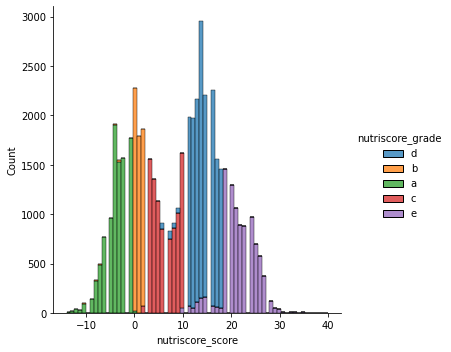

In [88]:
#Distribution des nutriscore
nutri_base = base.nutriscore_score.dropna()[:2000000]

sns.displot(travail1, x="nutriscore_score",hue="nutriscore_grade", multiple="stack")

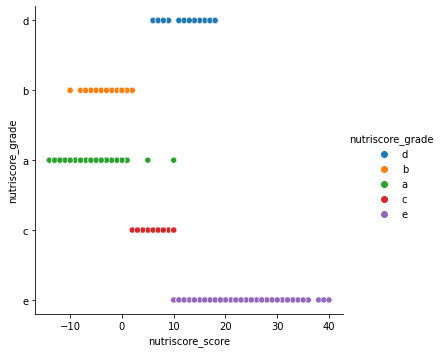

In [89]:
sns.relplot(data=travail1, x="nutriscore_score",y="nutriscore_grade", hue="nutriscore_grade")

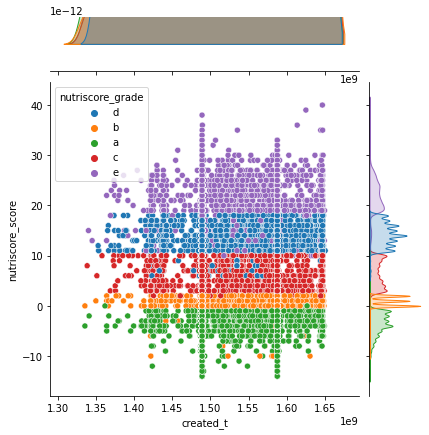

In [90]:
sns.jointplot(data=travail1, x="created_t", y="nutriscore_score", hue='nutriscore_grade')

In [91]:
#Création d'un deuxième set d'observation contenant également la densité calorique du produit
travail2 = base[["url","created_t","nutriscore_grade","nutriscore_score", "energy_100g"]].dropna()
travail2.energy_100g = travail2.energy_100g.astype(float)

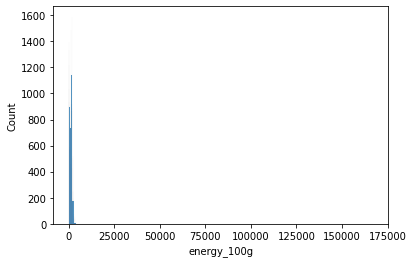

In [92]:
#distribution de la densité caloriques (beaucoup d'outliers)
sns.histplot(travail2[:25000], x="energy_100g")

In [93]:
#Exemple d'outlier
travail2[travail2["energy_100g"]>20000].iloc[8].url

'http://world-en.openfoodfacts.org/product/4008366014507/asia-style-chicken-frosta'

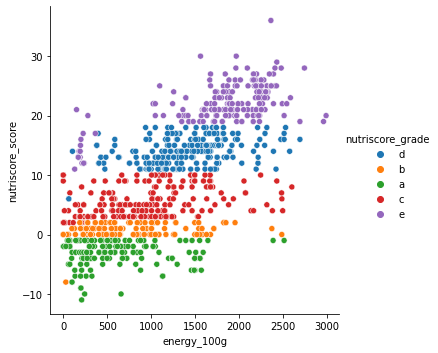

In [94]:
#Nutriscore en fonction de la densité calorique, coloré par grade nutriscore
sns.relplot(data=travail2[travail2.energy_100g<3000.0][:1000], x="energy_100g",y="nutriscore_score", hue="nutriscore_grade")

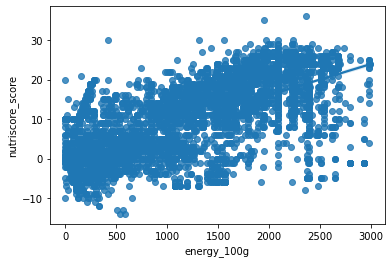

In [95]:
tr2 = travail2[travail2.energy_100g<3000.0][:5000]

#Regression montrant une relation linéaire entre les calories pour 100g et le score
sns.regplot(data=tr2, x="energy_100g",y="nutriscore_score")


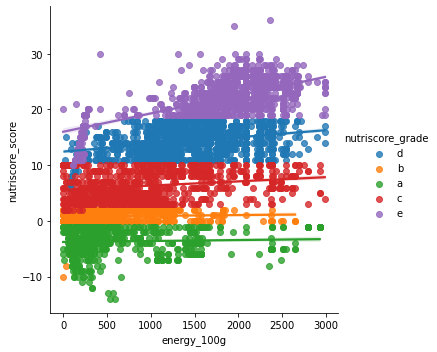

In [96]:
sns.lmplot(data=tr2, x="energy_100g",y="nutriscore_score", hue="nutriscore_grade")

In [97]:
#Création d'un troisième set d'observation contenant diverses informations nutritionelles

travail3 = base[["url","created_t","nutriscore_grade","nutriscore_score", "energy_100g","carbohydrates_100g","sugars_100g","fat_100g", "proteins_100g"]].dropna()

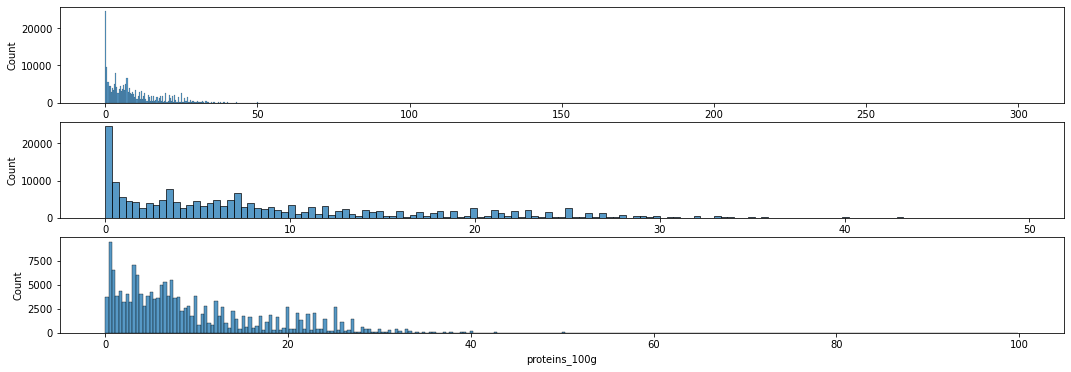

In [98]:
#protéines <100g sinon illisible

plt.figure(figsize=(18,6))
plt.subplot(3, 1, 1)
sns.histplot(data=travail3[::4], x="proteins_100g")
plt.subplot(3, 1, 2)
sns.histplot(data=travail3[travail3.proteins_100g<50][::4], x="proteins_100g")
plt.subplot(3, 1, 3)
sns.histplot(data=travail3[(travail3.proteins_100g>0)&(travail3.proteins_100g<100)][::4], x="proteins_100g")
plt.show()

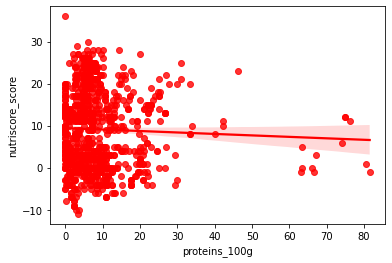

In [99]:
#regression et affichage des protéines par 100 grammes en relation avec le nutriscore 
sns.regplot(data=travail3[travail3.proteins_100g<100][:1000], x="proteins_100g",y="nutriscore_score",color="red")


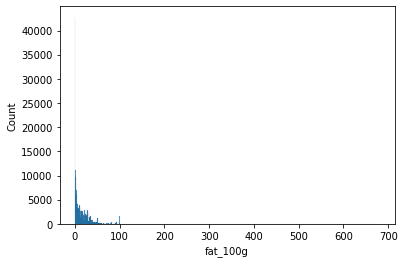

In [100]:
#gras <100 sinon trop d'outliers comme pour protéines

sns.histplot(data=travail3[::4], x="fat_100g")
sns.histplot(data=travail3[travail3.fat_100g<100][::4], x="fat_100g")

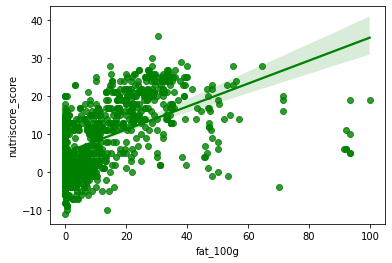

In [101]:
#regression et affichage du gras par 100 grammes en relation avec le nutriscore 

sns.regplot(data=travail3[travail3.fat_100g<100][:1000], x="fat_100g",y="nutriscore_score",color="green")


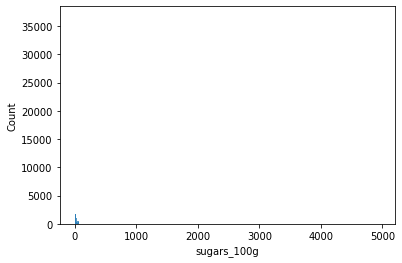

In [102]:
#sucre idem
sns.histplot(data=travail3[::4], x="sugars_100g")
sns.histplot(data=travail3[travail3.sugars_100g<100][::4], x="sugars_100g")

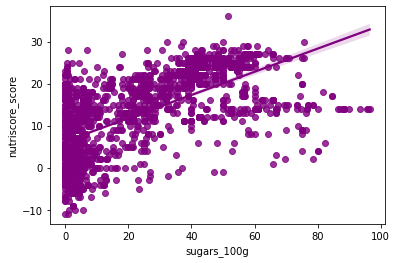

In [103]:
#regression et affichage du sucre par 100 grammes en relation avec le nutriscore 
sns.regplot(data=travail3[travail3.sugars_100g<100][:2000], x="sugars_100g",y="nutriscore_score", color="purple")


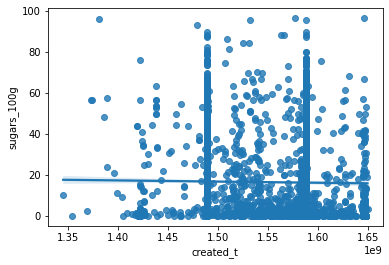

In [104]:
#regression et affichage du sucre par 100 grammes en relation avec la date de création de l'entrée du produit dans la BDD 

sns.regplot(data=travail3[travail3.sugars_100g<100][:5000], x="created_t",y="sugars_100g")


In [117]:
#Création d'un quatrième set d'observation contenant plus  d'informations nutritionelles

travail4 = base[["nutriscore_grade","nutriscore_score", "energy_100g","carbohydrates_100g","sugars_100g","fat_100g", "proteins_100g","fiber_100g","fruits-vegetables-nuts_100g","salt_100g"]].dropna()

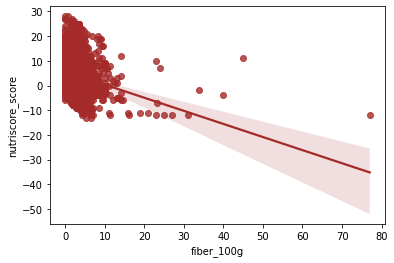

In [118]:
#regression et affichage du sucre par 100 grammes en relation avec le nutriscore 

sns.regplot(data=travail4[travail4.fiber_100g<100][:3000], x="fiber_100g",y="nutriscore_score", color="brown")


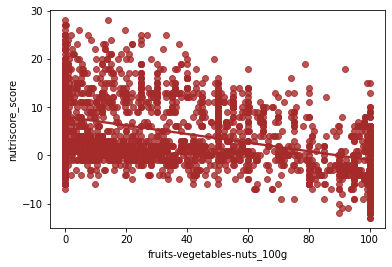

In [119]:
sns.regplot(data=travail4[travail4.fiber_100g<100][:3000], x="fruits-vegetables-nuts_100g",y="nutriscore_score", color="brown")

In [126]:
#préparation des données nécessaires à la classification
travail5 = base[["nutriscore_grade", "salt_100g","energy_100g","carbohydrates_100g","sugars_100g","fat_100g" , "proteins_100g","fiber_100g","fruits-vegetables-nuts_100g","saturated-fat_100g"]].dropna()

In [127]:
travail5.shape

(7272, 10)

In [128]:
#organisation des données pour les fournir aux modèles
labels = (travail5.nutriscore_grade).to_numpy()
features = (travail5.drop('nutriscore_grade', 1).to_numpy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
#imports utiles pour le ML
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import *
from sklearn.model_selection import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.metrics import *


In [129]:
#Fonction d'évaluation de modèle : affichage du score, matrice de confusion, courbes d'apprentissage
def evaluation(model, X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(model.score(X_test,y_test))
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, 
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    return model

RandomForest
0.8146314631463146
[[416  57   9   1   0]
 [ 37 273  45   3   5]
 [ 31  50 331  27   8]
 [  5   5  29 302   6]
 [  3   0   3  13 159]]
              precision    recall  f1-score   support

           a       0.85      0.86      0.85       483
           b       0.71      0.75      0.73       363
           c       0.79      0.74      0.77       447
           d       0.87      0.87      0.87       347
           e       0.89      0.89      0.89       178

    accuracy                           0.81      1818
   macro avg       0.82      0.82      0.82      1818
weighted avg       0.82      0.81      0.81      1818

SVC
0.41914191419141916
[[218 112  47  87   1]
 [ 58 178  82  32   1]
 [ 80 107 156  99  14]
 [  8  34 124 159  25]
 [ 40  58   8  39  51]]
              precision    recall  f1-score   support

           a       0.54      0.47      0.50       465
           b       0.36      0.51      0.42       351
           c       0.37      0.34      0.36       456
      

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

0.4328932893289329
[[400  28  30   3   0]
 [157 104  90  19   0]
 [116  46 218  71   0]
 [ 34  52 192  65   0]
 [ 32  13 104  44   0]]
              precision    recall  f1-score   support

           a       0.54      0.87      0.67       461
           b       0.43      0.28      0.34       370
           c       0.34      0.48      0.40       451
           d       0.32      0.19      0.24       343
           e       0.00      0.00      0.00       193

    accuracy                           0.43      1818
   macro avg       0.33      0.36      0.33      1818
weighted avg       0.37      0.43      0.38      1818



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

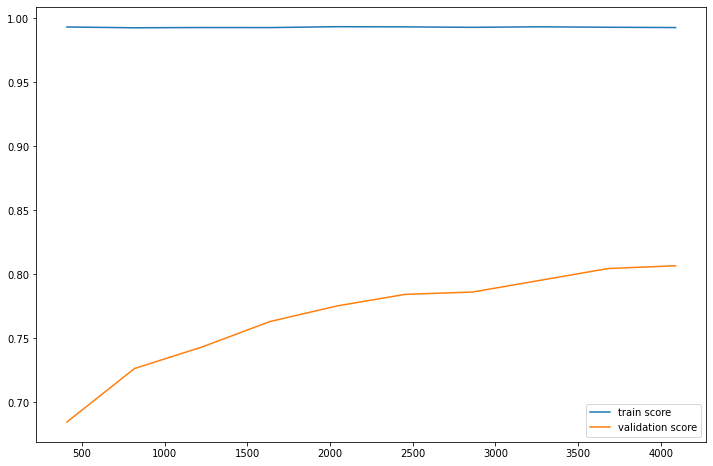

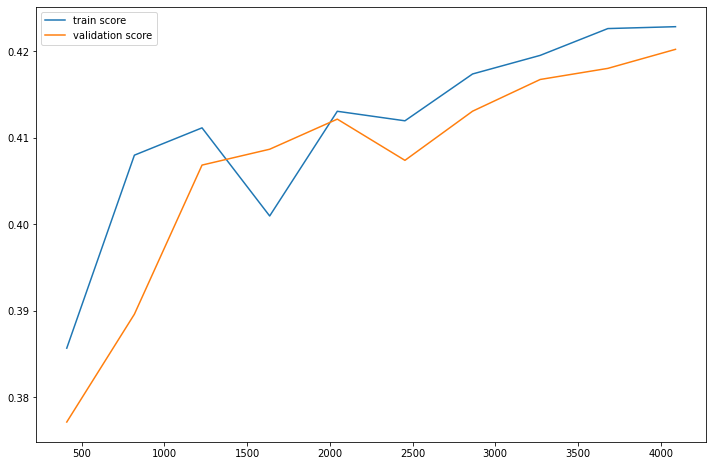

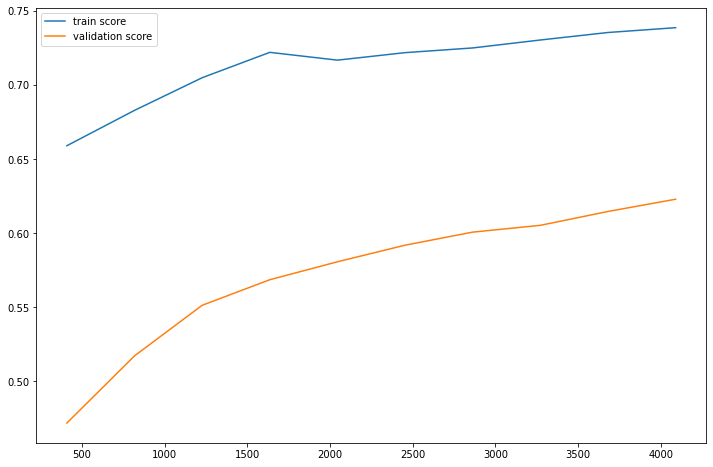

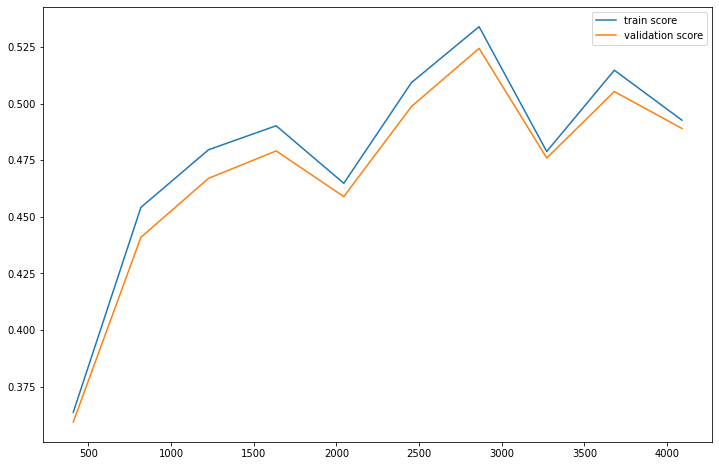

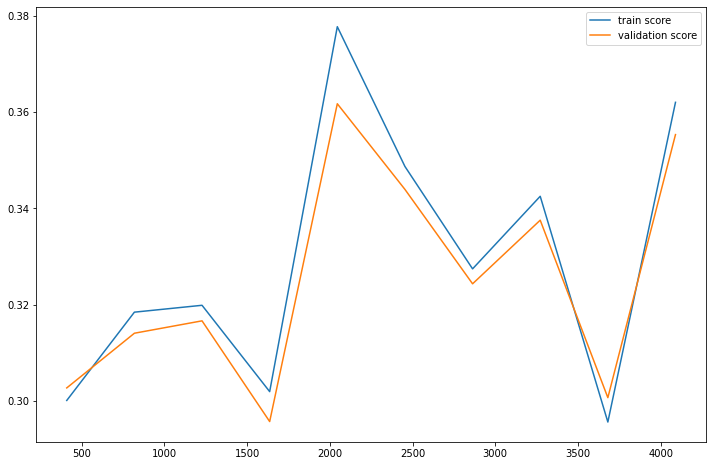

In [115]:
#Nous essayons différents modèles
modeles = [RandomForestClassifier(), SVC(), KNeighborsClassifier(), MLPClassifier(), LinearSVC()]
nom = ["RandomForest","SVC","KNN","MLP","Linear SVC"]
i=0
for test in modeles:
  print(nom[i])
  i+=1
  evaluation(test, features, labels)

0.8811881188118812
[[419  26   6   0   0]
 [ 25 298  38   1   4]
 [  7  33 385  16   3]
 [  2   0  31 337   7]
 [  1   2   1  13 163]]
              precision    recall  f1-score   support

           a       0.92      0.93      0.93       451
           b       0.83      0.81      0.82       366
           c       0.84      0.87      0.85       444
           d       0.92      0.89      0.91       377
           e       0.92      0.91      0.91       180

    accuracy                           0.88      1818
   macro avg       0.89      0.88      0.88      1818
weighted avg       0.88      0.88      0.88      1818



RandomForestClassifier(n_estimators=500)

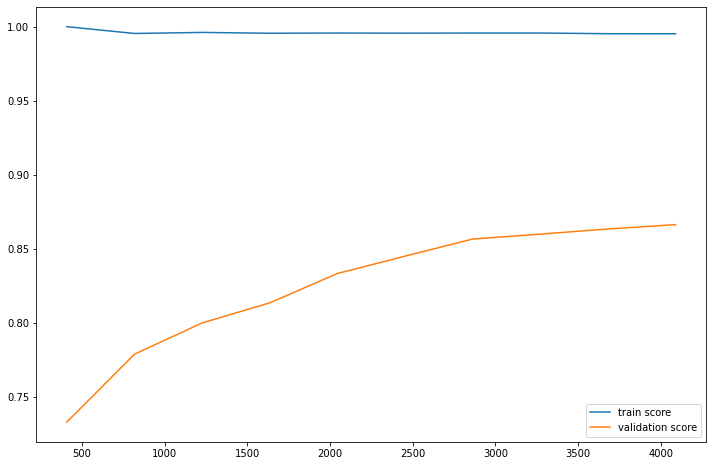

In [131]:
  #modèle final
  evaluation(RandomForestClassifier(n_estimators=500), features, labels)